In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Explain briefly in your own words how linear regression works


##### a linear regression is a predictive analysis that exist of a dependent variable and a independepel variable. The  idea of linear regression is to examine two things. The model predicts the relation between at least 2 varibles. The outcome is always linair. 

In [19]:
df = pd.read_csv('data Mashable.csv')
df.head(8)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091


In [70]:
df['global_subjectivity'].value_counts() #I dont get why this commad does not show me all the values of global_subjectivity
# so i don't know how to clean this data right now, because im affraid it will drop vallid numbers and only keep the 1.0

1.0    2
Name: global_subjectivity, dtype: int64

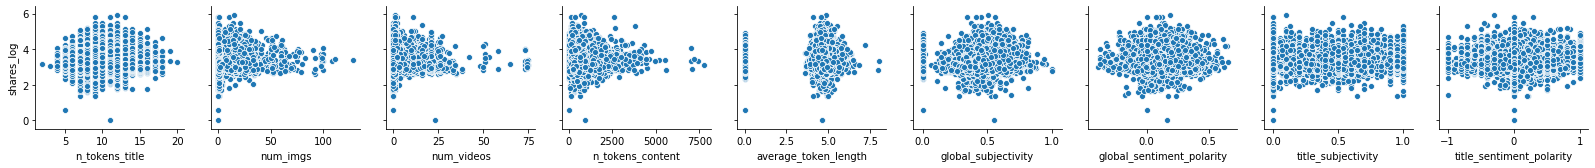

In [33]:
sns.pairplot(df,
             y_vars=["shares_log"],
             x_vars=['n_tokens_title', 'num_imgs', 'num_videos', 'n_tokens_content', 'average_token_length','global_subjectivity','global_sentiment_polarity','title_subjectivity','title_sentiment_polarity'])
plt.show()

#### I find it difficult to find variables that collerate with shares_log, I looked at all the nominal variables  from the dataset that seems to have some colleration.I will make a subset out of it and I will add the Url for the ID later on 

In [57]:
df_subset = df[['n_tokens_title', 'num_imgs', 'num_videos', 'n_tokens_content', 'global_subjectivity']]
df_subset.head(8)

,n_tokens_title,num_imgs,num_videos,n_tokens_content,global_subjectivity
0,10,12,0,821,0.439379
1,9,6,0,489,0.300454
2,11,0,1,131,0.575486
3,8,2,0,556,0.327220
4,9,18,0,880,0.507709
5,13,2,0,303,0.394298
6,6,11,0,544,0.439512
7,12,1,0,223,0.394792


In [58]:
y = df['shares_log'] #I took Share_log instead of shares because the diffrences between the shares is sometime to big
# for example one has 274 shares and there are some artikels with more than 30.000 shares. Share_log make it easier to 
# make sence of the data 
X = df_subset #this slices the dataframe to include all rows and the columns from "url" to "title_sentiment_polarity"
X.index = df['url'] #this stores the artikel url in the column names, so I don't lose track of them later
X.head() #trainset

,n_tokens_title,num_imgs,num_videos,n_tokens_content,global_subjectivity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,10,12,0,821,0.439379
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,9,6,0,489,0.300454
http://mashable.com/2013/02/01/hello-kitty-rocket/,11,0,1,131,0.575486
http://mashable.com/2014/02/06/add-us-on-snapchat/,8,2,0,556,0.327220
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,9,18,0,880,0.507709


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head(10) #The train data #testset 

,n_tokens_title,num_imgs,num_videos,n_tokens_content,global_subjectivity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,0,1,141,0.451711
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,9,0,392,0.476976
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,1,0,622,0.488495
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,23,1,251,0.545746
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,13,2,940,0.507042
http://mashable.com/2013/10/07/nhl-locked-bathroom-twitter/,7,1,1,452,0.456145
http://mashable.com/2014/04/16/kfc-double-down/,10,1,0,324,0.300000
http://mashable.com/2013/11/07/thorium-power-everything/,10,0,1,482,0.408417
http://mashable.com/2013/03/05/kickstarter-concert-tour/,11,27,1,2486,0.435746


### From the dataset 30% is seperated from the dataset, I will train my model on the 70%

In [60]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [61]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
-0.002611,n_tokens_title
0.004428,num_imgs
0.003609,num_videos
-0.000016,n_tokens_content
0.296838,global_subjectivity


In [1]:
#### Here we can see that with most varibles there is few coefficient, but with global subjectivity there is 0.29 coefficient. A value of zero indicates that there is no relationship between the two variables

# An equation of the model (please use Markdown formulas)


In [81]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[1] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
print(f"The regression line is equal to y = {b0:.2f} + {b1:.3f}X") #.0f formats to 3 decimals. because 2 decmails would
# give us a 0.00 value. 3.13 + 0.004x if a artikel contain num_imgs it adds 0.004 to share_logs

The regression line is equal to y = 3.13 + 0.004X


In [62]:
y_pred = lm.predict(X_test)
resid = y_pred - y_test

# Plots of the relation of your selected variables with the target


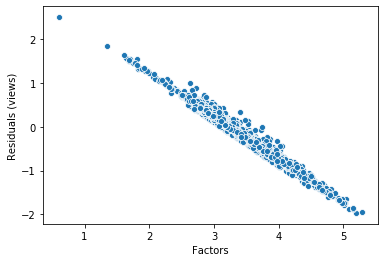

In [63]:
sns.scatterplot(x=y_test,y=resid,data=df)
plt.xlabel('Factors')
plt.ylabel('Residuals (views)')
plt.show()

# Comment on the linearity of those relationships


#### this plot  shows that the model will only correctly on verry little occasions. Arround the 3.2 mark the model predicts correctly. As you can see this is just a verry small section. 

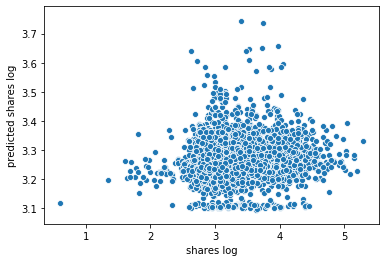

In [64]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('shares log')
plt.ylabel('predicted shares log')
plt.show()

# Predictive power of the model (R2, RMSE)


In [65]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.017285975642393647

#### predect percentage is low. The model can only declare 2% of the residuals

In [56]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40033994806745177

# can i convert this number to the real amount of shares?

In [31]:
10**(10 **(math.sqrt(mean_squared_error(y_test, y_test_p))))

328.4019756056932

In [80]:
y = 3.3222 
# y= 3.322 because the coef shows us that y = 3.13 

10**(y)

2099.9067037624263

### we tryed to convert the log to acctual number of shares, however we are still uncertain if this is the correct way. But this number should indicate the minimum amount of shares ( the intercept)